In [1]:
input('Warning: contains solution spoilers. Press enter to continue.')
import numpy as np
import matplotlib.pyplot as plt

# Problem set 6

## Question 1

In [2]:
u = .5
dx = 0.01
Lx = 1.
x = np.arange(0, Lx+dx, dx)
sin_ic = lambda x: np.sin(2*np.pi*x)
saw_ic = lambda x: 2*x - 2*np.floor(x)

def upwind(ic, u=.5, dx=0.01, L=1, dt=0.01, T=1, snapshots=[]):
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)

    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(ic(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = u*dt/dx
    
    # Matrix for upwind
    M = (1-dtdx)*np.identity(n) + \
        dtdx*np.diag([1]*(n-1), -1) 

    # Enforce BC
    M[0,0] = 0.

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = M@phi  # upwind step
        phi[0] =  phi[-1] # enforce periodic BC

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list


def plot_phis(x, ts, phi_list):
    colors = plt.cm.magma(np.linspace(0, 1, len(phi_list)))
    for i, phi in enumerate(phi_list):
        plt.plot(x, phi, label=f"{ts[i]:.2f}", color=colors[i])
    plt.legend(loc='upper right')


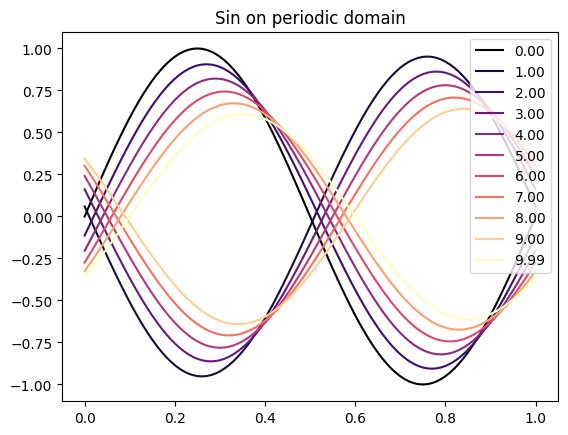

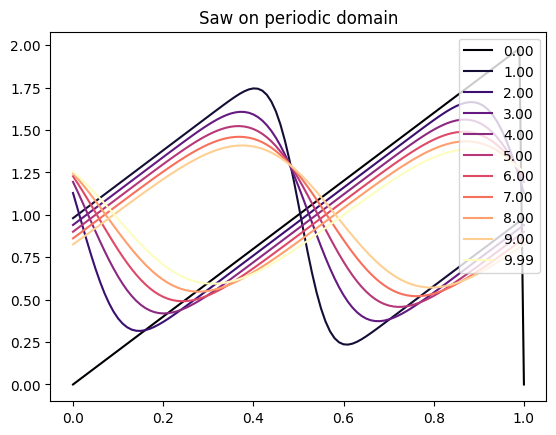

In [11]:
plt.title('Sin on periodic domain')
out = upwind(sin_ic, u=.51, dx=0.01, L=1, dt=0.01, T=10, snapshots=10)
plot_phis(*out)
plt.show()

plt.title('Saw on periodic domain')
out = upwind(saw_ic, u=.51, dx=0.01, L=1, dt=0.01, T=10, snapshots=10)
plot_phis(*out)
plt.show()

FTCS

In [22]:
def ftcs(ic, u=.5, dx=0.01, L=1, dt=0.01, T=1, snapshots=[]):
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)

    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(ic(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = u*dt/(2*dx)
    
    # Matrix for ftcs
    M = np.identity(n) + \
        -dtdx*np.diag([1]*(n-1), 1) +\
        dtdx*np.diag([1]*(n-1), -1)

    # # Enforce BC
    # M[0,0] = 0.
    # M[-1,-1] = 1- dt/dx * u

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = M@phi  # upwind step
        phi[0] = phi[-1]  # periodic bc

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list

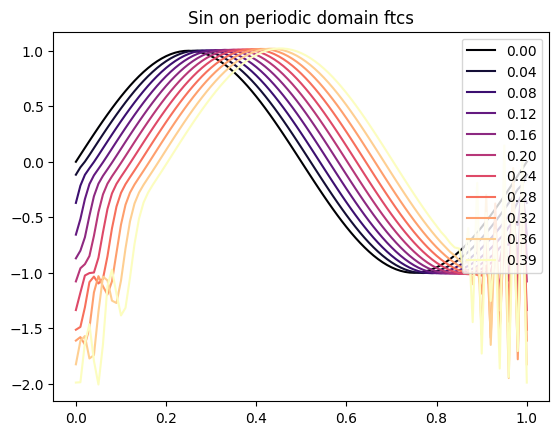

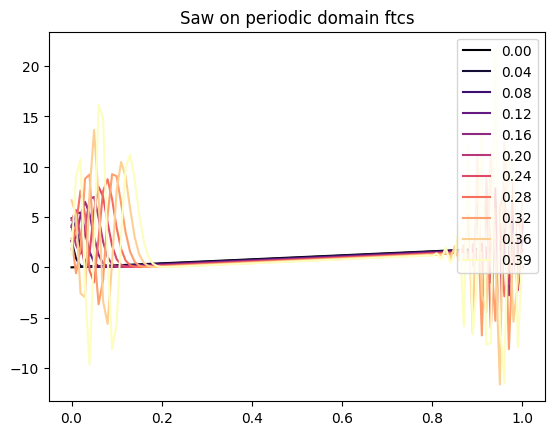

In [26]:
plt.title('Sin on periodic domain ftcs')
out = ftcs(sin_ic, u=.51, dx=0.01, L=1, dt=0.01, T=0.4, snapshots=10)
plot_phis(*out)
plt.show()

plt.title('Saw on periodic domain ftcs')
out = ftcs(saw_ic, u=.51, dx=0.01, L=1, dt=0.01, T=0.4, snapshots=10)
plot_phis(*out)
plt.show()

## Question 2

In [35]:
def btcs(ic, u=.5, dx=0.01, L=1, dt=0.01, T=1, snapshots=[]):
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)

    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(ic(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = u*dt/(2*dx)
    
    # Matrix for btcs
    M = np.identity(n) + \
        +dtdx*np.diag([1]*(n-1), 1) +\
        -dtdx*np.diag([1]*(n-1), -1)

    # Enforce BC
    M[0, -1] = -dtdx
    M[-1, 0] = dtdx

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = np.linalg.solve(M, phi)  # step

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list

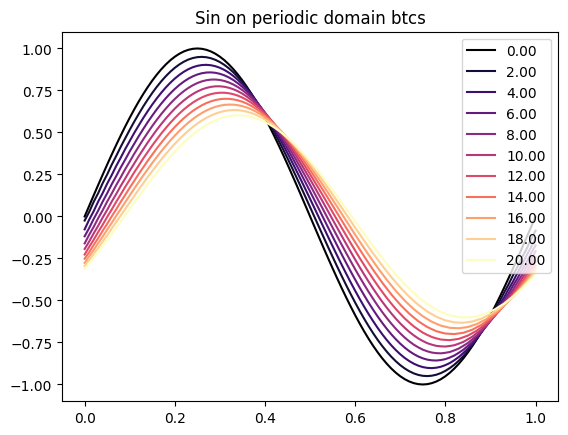

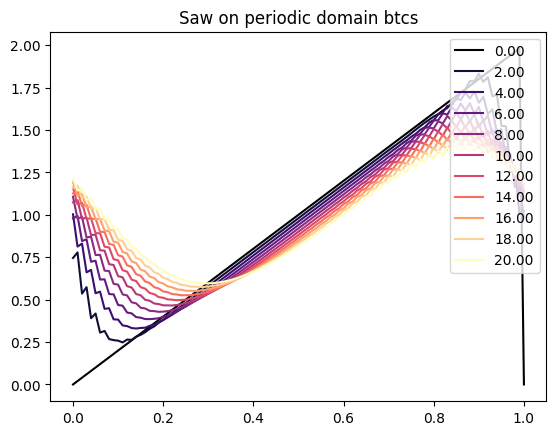

In [49]:
plt.title('Sin on periodic domain btcs')
out = btcs(sin_ic, u=.51, dx=0.01, L=1, dt=0.005, T=20, snapshots=10)
plot_phis(*out)
plt.show()

plt.title('Saw on periodic domain btcs')
out = btcs(saw_ic, u=.51, dx=0.01, L=1, dt=0.005, T=20, snapshots=10)
plot_phis(*out)
plt.show()

## Question 3